# figures for the 'per fold' model

In [2]:
# imports 
import pandas as pd
import pickle5
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob 
from collections import Counter
from matplotlib.colors import ListedColormap

In [3]:
categories = pickle5.load(open('../../phynteny_utils/phrog_annotation_info/integer_category.pkl', 'rb'))
categories = dict(zip([str(i) for i in list(categories.keys())],list(categories.values())))

sns.set_style("dark")

In [7]:
dict(zip(categories, colors))

{'integration and excision': '#1b9e77',
 'connector': '#d95f02',
 'head and packaging': '#7570b3',
 'DNA, RNA and nucleotide metabolism': '#e7298a',
 'lysis': '#66a61e',
 'moron, auxiliary metabolic gene and host takeover': '#cab2d6',
 'other': '#a6761d',
 'tail': '#e6ab02',
 'transcription regulation': '#80b1d3'}

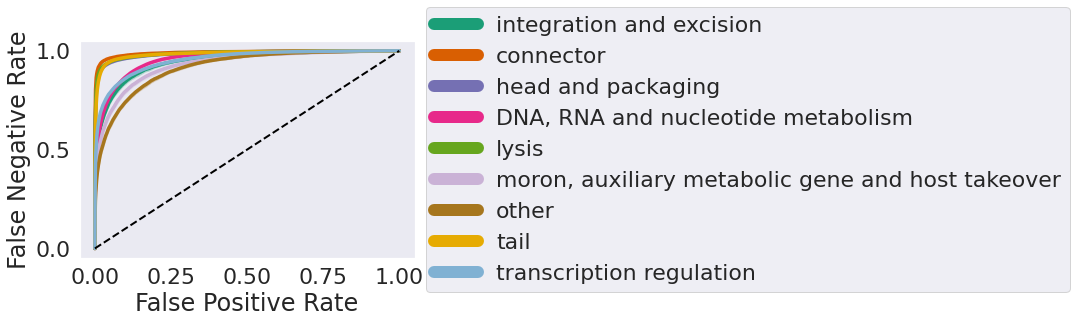

In [5]:
base = '../../scripts/many_to_one/per_fold_test/per_fold_test_'
ROC_mat = [[] for i in range(10)]
#colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"] 
colors = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e","#cab2d6",  "#a6761d", "#e6ab02", "#80b1d3"]
for i in range(10): 
    
    file_name = base + str(i) + '_ROC.tsv'
    df = pd.read_csv(file_name, sep = '\t', index_col = 'Unnamed: 0')
    
    categories = [i for i in df.columns.to_list() if i != 'FPR']
    
    for j in range(len(categories)): 
        
        ROC_mat[j].append(df[categories[j]].to_list())  
    
FPR = df['FPR']
sns.set(font_scale=2)

sns.set_style("dark")
plt.rcParams["figure.figsize"] = (10,10)

for k in range(len(categories)): 
    
    this_df = pd.DataFrame(np.array(ROC_mat[k]).T)
    mean = this_df.mean(axis = 1)
    #std = 1.96 * this_df.std(axis = 1)/np.sqrt(4)
    std =  this_df.std(axis = 1)
    upper = mean + std
    lower = mean - std
    
    ax = plt.plot(FPR, mean,  color = colors[k], label = categories[k], lw = 3.5)
    plt.fill_between(FPR,lower, upper, color = colors[k], alpha = 0.2) 
    
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")

    
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.savefig('/home/grig0076/GitHubs/Phynteny/all_features_ROC.png')    

leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(12.0)
    
plt.show() 

In [64]:
categories

['integration and excision',
 'connector',
 'head and packaging',
 'DNA, RNA and nucleotide metabolism',
 'lysis',
 'moron, auxiliary metabolic gene and host takeover',
 'other',
 'tail',
 'transcription regulation']

In [32]:
# obtain the AUC for each curve ()
pickle5.load(open('../../scripts/many_to_one/per_fold_test/per_fold_test_1_AUC.pkl', 'rb'))


base = '../../scripts/many_to_one/per_fold_test/'
AUC_list = [[] for i in range(10)]

for i in range(10): 
    
    file_name = base + 'per_fold_test_' + str(i) + '_AUC.pkl'
    
    this_AUC = pickle5.load(open(file_name, 'rb'))
    
    categories = list(this_AUC.keys())
    
    for j in range(len(categories)):
        
        AUC_list[j].append(this_AUC.get(categories[j]))

        
AUC_df = pd.DataFrame(np.array(AUC_list).T)
AUC_df.columns = categories
AUC_df.mean()

#assemble a dataframe 
AUC_mean = [round(i,4) for i in AUC_df.mean()]
AUC_std = [round(i,4) for i in AUC_df.std()]
AUC_strings = [str(AUC_mean[i]) + ' ' + u"\u00B1" + ' ' + str(AUC_std[i])  for i in range(len(AUC_mean))]

In [33]:
df = pd.DataFrame({'AUC': AUC_strings})
df.index= categories
df

,AUC
integration and excision,0.945 ± 0.0043
connector,0.9903 ± 0.0015
head and packaging,0.9847 ± 0.0013
"DNA, RNA and nucleotide metabolism",0.9572 ± 0.0022
lysis,0.9858 ± 0.0014
"moron, auxiliary metabolic gene and host takeover",0.9295 ± 0.006
other,0.9155 ± 0.0034
tail,0.9846 ± 0.0008
transcription regulation,0.9532 ± 0.0025
average,0.9607 ± 0.002


In [36]:
report_df = pd.DataFrame(columns = ['precision', 'recall', 'f1-score', 'support', 'class'] )

for i in range(0,10): 
    report = pickle5.load(open('../../scripts/many_to_one/per_fold_test/per_fold_test_' + str(i) + '_report.tsv', 'rb'))
    report = pd.DataFrame(report).T
    report['class'] = report.index
    
    report_df = pd.concat([report_df, report])
    
report_df =pd.melt(report_df, id_vars = ['class', 'support'], value_vars = ['precision', 'recall', 'f1-score'], var_name = 'metric', value_name='score')
report_df['category'] = [categories.get(c) for c in report_df['class']]
report_df = report_df[~report_df['class'].isin(['accuracy', 'macro avg'])]

<ipython-input-37-d181fdfd48fc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.barplot(data = report_df, x = 'score', y = 'category', hue = 'metric', palette = ('#DDAA33', '#BB5566' , '#004488'), ci = 90)


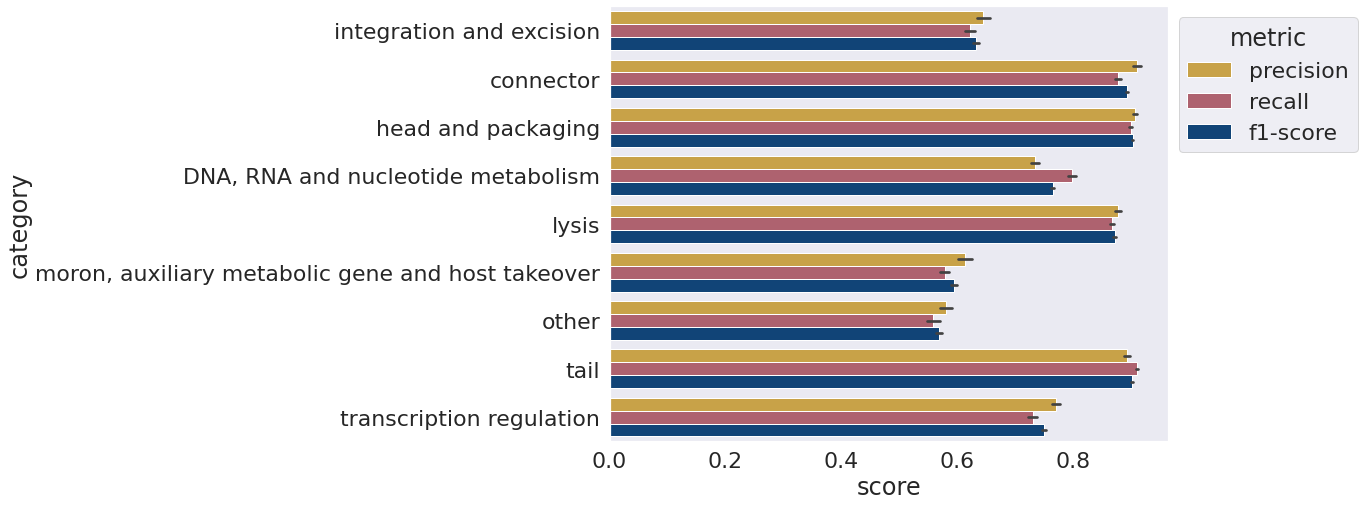

In [37]:
si
ax = sns.barplot(data = report_df, x = 'score', y = 'category', hue = 'metric', palette = ('#DDAA33', '#BB5566' , '#004488'), ci = 90)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

## Determine thresholds to use for the model


In [38]:
thresh = pd.read_csv('/home/grig0076/scratch/phynteny_data/many_to_one_data/test_base/threshold_metrics.tsv', sep = '\t', index_col=0)
cat_list = list(categories.values())[:-1]
counter = 0 
v = 0.95 # cutoff for the probability of the prediction 
thresh_proportion = pd.DataFrame()
thresh_dict = dict() 

for c in cat_list: 
    
    df = thresh[thresh['category'] == c]
    df['proportion'] = df['support']/df['support'].max()
    
    if counter == 0: 
        thresh_proportion = df
        
    else: 
        thresh_proportion = pd.concat([thresh_proportion,df], axis=0)
        
    # in this loop try to find the cut off 
    cat_thresh = df[df['precision'] > v]['threshold'].to_list()[0]
    cat_prop = df[df['precision'] > v]['proportion'].to_list()[0]
    thresh_dict[c] = cat_thresh
    print('CATEGROY: ' + c)
    print('threshold: ' + str(cat_thresh))
    print('proportion: ' + str(cat_prop))
    print()
    
    counter += 1

CATEGROY: DNA, RNA and nucleotide metabolism
threshold: 6.25
proportion: 0.8369272237196765

CATEGROY: connector
threshold: 0.0
proportion: 1.0

CATEGROY: head and packaging
threshold: 0.0
proportion: 1.0

CATEGROY: integration and excision
threshold: 6.46
proportion: 0.7666548547129696

CATEGROY: lysis
threshold: 4.65
proportion: 0.9742261365108147

CATEGROY: moron, auxiliary metabolic gene and host takeover
threshold: 5.82
proportion: 0.818921308576481

CATEGROY: other
threshold: 5.96
proportion: 0.7904089899385862

CATEGROY: tail
threshold: 0.0
proportion: 1.0

CATEGROY: transcription regulation
threshold: 5.36
proportion: 0.9216044548855825



<ipython-input-38-678548da9819>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proportion'] = df['support']/df['support'].max()
<ipython-input-38-678548da9819>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proportion'] = df['support']/df['support'].max()
<ipython-input-38-678548da9819>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

KeyError: 0

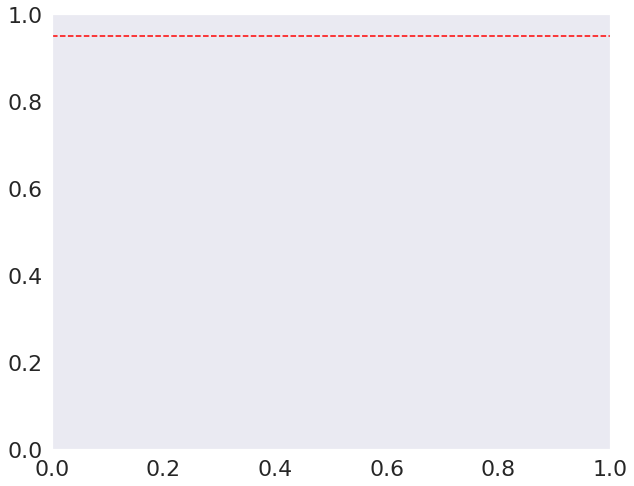

In [39]:
plt.figure(figsize=(10, 8))
plt.axhline(y=0.95, color='red', linestyle='--')

for k in range(len(categories)): 
    t = thresh_proportion[thresh_proportion['category'] == categories[k]]
    g = sns.lineplot(data=t, x='proportion', y='precision',color = colors[k], linewidth=3)
    g.set(ylim=(0.5, None))
    
#g.legend(label='')
plt.show()

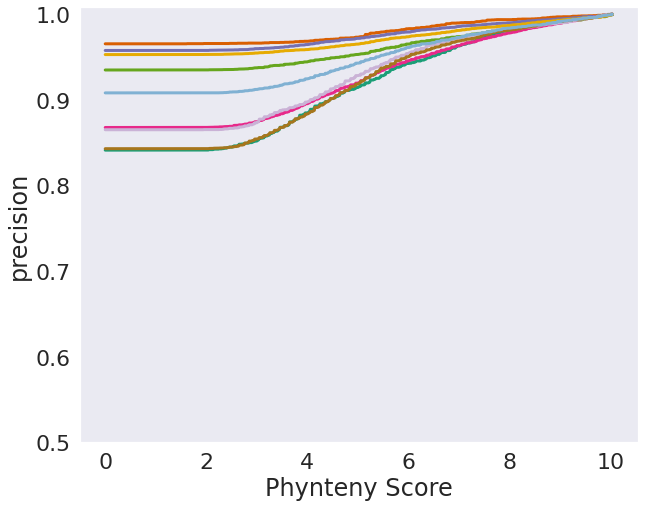

In [91]:
plt.figure(figsize=(10, 8))

for k in range(len(categories)): 
    t = thresh_proportion[thresh_proportion['category'] == categories[k]]
    g = sns.lineplot(data=t, x='threshold', y='precision',color = colors[k], linewidth=3)
    g.set(ylim=(0.5, None))
    
#g.legend(label='')
g.set_xlabel('Phynteny Score')
plt.show()

In [92]:
#plot the metrics at this new threshold 
thresh

,class,precision,recall,f1-score,accuracy,threshold,support,category
0,1,0.841247,1.0,0.913780,0.841247,0.00,5644.0,integration and excision
1,1,0.841247,1.0,0.913780,0.841247,0.01,5644.0,integration and excision
2,1,0.841247,1.0,0.913780,0.841247,0.02,5644.0,integration and excision
3,1,0.841247,1.0,0.913780,0.841247,0.03,5644.0,integration and excision
4,1,0.841247,1.0,0.913780,0.841247,0.04,5644.0,integration and excision
...,...,...,...,...,...,...,...,...
9040,9,0.999221,1.0,0.999610,0.999221,10.00,5134.0,transcription regulation
9041,9,0.999373,1.0,0.999687,0.999373,10.01,4787.0,transcription regulation
9042,9,0.999302,1.0,0.999651,0.999302,10.02,4299.0,transcription regulation
9043,9,1.000000,1.0,1.000000,1.000000,10.03,3580.0,transcription regulation


In [109]:
best = pd.DataFrame()
counter = 0 

for c in categories: 
    d = thresh_proportion[thresh_proportion['category'] == c]
    d = d[d['threshold'] == thresh_dict.get(c)]
    
    if counter == 0: 
        best = d 
    else: 
        best = pd.concat([best, d], axis=0)
    counter += 1
    
    

### Predict unknowns in Prophages 


In [119]:
files = glob.glob('/home/grig0076/scratch/phynteny_data/predicted_prophages_v3/*.tsv')
#files = files[:1000]

In [121]:
#sum = 0 
counter = 0 
count_sum = pd.DataFrame(np.zeros(10))
count_sum.index = ['unknown function', 'transcription regulation', 'tail', 'connector',
       'integration and excision', 'head and packaging', 'lysis',
       'DNA, RNA and nucleotide metabolism', 'other',
       'moron, auxiliary metabolic gene and host takeover']

predict_sum = pd.DataFrame(np.zeros(10))
predict_sum.index = ['unknown function', 'transcription regulation', 'tail', 'connector',
       'integration and excision', 'head and packaging', 'lysis',
       'DNA, RNA and nucleotide metabolism', 'other',
       'moron, auxiliary metabolic gene and host takeover']

for f in files: 
    
    df = pd.read_csv(f, sep = '\t')
    
    # get the known categories 
    counts = pd.DataFrame.from_dict(Counter(df['phrog_category']), orient = 'index')
    count_sum = pd.concat([count_sum, counts]).groupby(level=0).sum()
    
    # get the predictions 
    p = pd.DataFrame.from_dict(Counter(df[df['phrog_category'] == 'unknown function']['phynteny_category']), orient = 'index')
    predict_sum = pd.concat([predict_sum, p]).groupby(level=0).sum()
    
    counter += 1

(0.0, 20.01)

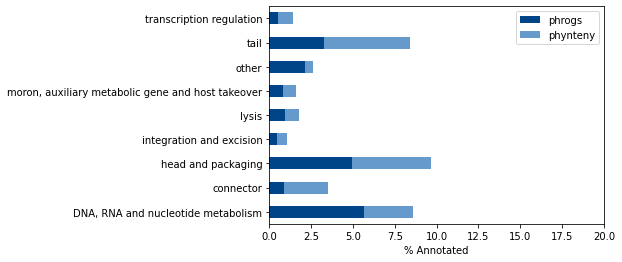

In [18]:
total = count_sum.sum()[0]
colors = ['#004488', '#6699CC'] 
rate_df = pd.concat([count_sum*100/total, predict_sum*100/total], axis = 1)
rate_df.columns = ['phrogs', 'phynteny']
ax = rate_df.drop('unknown function').plot(kind='barh', stacked = True, colormap=ListedColormap(colors))
ax.set_xlabel('% Annotated')
ax.set_xlim((0,20.01))

In [ ]:
# in this data see if sequences with the same phrog id get annotated with the function 

In [66]:
# IMGVR dataset 
IMGVR_files = glob.glob('/home/grig0076/scratch/poznan_phynteny/phynteny_annotations/phynteny_IMGVR/*.tsv')

#sum = 0 
counter = 0 
count_sum = pd.DataFrame(np.zeros(10))
count_sum.index = ['unknown function', 'transcription regulation', 'tail', 'connector',
       'integration and excision', 'head and packaging', 'lysis',
       'DNA, RNA and nucleotide metabolism', 'other',
       'moron, auxiliary metabolic gene and host takeover']

predict_sum = pd.DataFrame(np.zeros(10))
predict_sum.index = ['unknown function', 'transcription regulation', 'tail', 'connector',
       'integration and excision', 'head and packaging', 'lysis',
       'DNA, RNA and nucleotide metabolism', 'other',
       'moron, auxiliary metabolic gene and host takeover']

# keep a record of all of the phages seen
phages = {}

for f in IMGVR_files: 
    
    df = pd.read_csv(f, sep = '\t')
    
    # get the known categories 
    counts = pd.DataFrame.from_dict(Counter(df['phrog_category']), orient = 'index')
    count_sum = pd.concat([count_sum, counts]).groupby(level=0).sum()
    
    # get the predictions 
    p = pd.DataFrame.from_dict(Counter(df[df['phrog_category'] == 'unknown function']['phynteny_category']), orient = 'index')
    predict_sum = pd.concat([predict_sum, p]).groupby(level=0).sum()
    
    #update the set of phages 
    phages = set(df['phage']).union(phages)
    counter += 1

In [15]:
len(phages) #this useful for stating that many of the phages do not have annotations 

2203930

<Figure size 576x576 with 0 Axes>

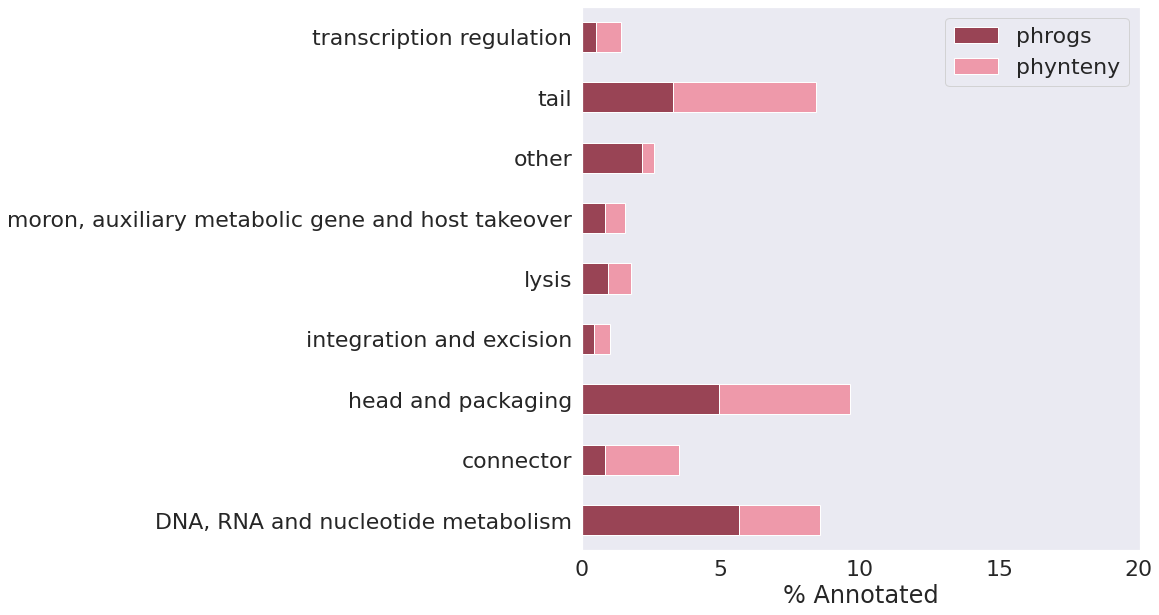

In [40]:
total = count_sum.sum()[0]
plt.figure(figsize=(8, 8))
colors = ['#994455', '#EE99AA'] 
rate_df = pd.concat([count_sum*100/total, predict_sum*100/total], axis = 1)
rate_df.columns = ['phrogs', 'phynteny']
ax = rate_df.drop('unknown function').plot(kind='barh', stacked = True, colormap=ListedColormap(colors))
ax.set_xlabel('% Annotated')
ax.set_xlim((0,20.05))
plt.show()

## Read in all of the tsv files

In [127]:
df = pd.read_csv('/home/grig0076/scratch/phynteny_data/predicted_prophages_v3/combined_file.tsv', sep = '\t', header=None)
df.columns = ['start', 'end', 'strand', 'phrog_id', 'phrog_category', 'phynteny_category', 'phage'] 

In [166]:
# get the counts of each phrog id 
phrog_ids = pd.DataFrame.from_dict(Counter(df[df['phrog_category'] == 'unknown function']['phrog_id']), orient = 'index').sort_values(0, ascending = False).index[1:26]
phrog_ids

Index(['28576', '8979', '288', '672', '1212', '250', '208', '2705', '1117',
       '98', '1402', '268', '571', '128', '5229', '36427', '28548', '340',
       '1852', '204', '749', '8806', '210', '8091', '1153'],
      dtype='object')

In [171]:
c

,0
tail,19
connector,301
lysis,1


In [172]:
for p in phrog_ids: 
    print()
    print(p)
    c = Counter(df[df['phrog_id'] == p]['phynteny_category'].to_list())
    c= pd.DataFrame.from_dict(c, orient = 'index')
    
    if 'unknown function' in c.index:
        c = c.drop('unknown function', axis = 0)
        
    print(dict(c*100/c.sum()))


28576
{0: tail                                  99.777035
other                                  0.111483
DNA, RNA and nucleotide metabolism     0.111483
Name: 0, dtype: float64}

8979
{0: head and packaging                                   98.742138
transcription regulation                              0.628931
DNA, RNA and nucleotide metabolism                    0.209644
tail                                                  0.209644
moron, auxiliary metabolic gene and host takeover     0.209644
Name: 0, dtype: float64}

288
{0: DNA, RNA and nucleotide metabolism                   82.022472
other                                                15.730337
transcription regulation                              1.872659
moron, auxiliary metabolic gene and host takeover     0.374532
Name: 0, dtype: float64}

672
{0: DNA, RNA and nucleotide metabolism    89.104116
transcription regulation              10.653753
other                                  0.242131
Name: 0, dtype: float64}

1212


In [59]:
# looks as though it is just working based off of the position 

0.19606552257152973

In [62]:
(count_sum.drop('unknown function', axis=0).sum()[0] + predict_sum.drop('unknown function', axis=0).sum()[0])/total

0.3854359767339519

In [ ]:
# estimate number of sequences in IMGVR that have no genes in them 

#get the number of phages that I have and then the number of phages which should be there 

In [ ]:
# have a look into why this dataset is so shitty 

In [ ]:
# next take unknown sequences and predict their function with AlphaFold 
# Write and submit the paper 

In [ ]:
# also make some distribution plot to show the rate of functional annotation better 
# size of genome versus amount annotated idk 

In [407]:
#see how different versions 3 and 4 are of the PHROGs data 
v4 = pd.read_csv('/home/grig0076/PHROGs/phrog_annot_v4.tsv', sep = '\t')
v3 = pd.read_csv('/home/grig0076/PhageAnnotation/PHROGs/phrog_annot_v3.tsv', sep = '\t')

In [411]:
Counter(v3['category'])

Counter({'integration and excision': 109,
         'head and packaging': 980,
         'transcription regulation': 334,
         'connector': 134,
         'tail': 1238,
         'lysis': 308,
         'DNA, RNA and nucleotide metabolism': 1104,
         'other': 581,
         'unknown function': 104151,
         'moron, auxiliary metabolic gene and host takeover': 465})

In [412]:
Counter(v4['category'])

Counter({'integration and excision': 109,
         'head and packaging': 989,
         'transcription regulation': 337,
         'connector': 139,
         'tail': 1257,
         'lysis': 314,
         'DNA, RNA and nucleotide metabolism': 1105,
         'other': 580,
         'unknown function': 104106,
         'moron, auxiliary metabolic gene and host takeover': 468})

In [ ]:
# on the IMGVR files determine whether the same unknown phrog id maps to the same category 
# just do for one of the files to begin with then expand to the other files as well 

In [69]:
unk_id = list(set(df[df['phrog_category'] == 'unknown function']['phrog_id'])) 

In [86]:
unk_id_counts = pd.DataFrame.from_dict(Counter(df[df['phrog_category'] == 'unknown function']['phrog_id']), orient = 'index')

In [93]:
top_100 = unk_id_counts.sort_values(0, ascending = False).index[1:100].to_list()

In [96]:
id_annots # we know this is bad - what if we do this on our prophages instead 

,0
tail,705
unknown function,48
head and packaging,12
connector,4
lysis,1
"moron, auxiliary metabolic gene and host takeover",1


In [95]:
#loop through the unknown 
for unk in top_100: 
    print(unk) 
    id_annots = pd.DataFrame.from_dict(Counter(df[df['phrog_id'] == unk]['phynteny_category'].to_list()), orient = 'index')
    print(id_annots/id_annots.sum())

16490
                                                          0
head and packaging                                 0.105291
unknown function                                   0.773274
tail                                               0.077489
DNA, RNA and nucleotide metabolism                 0.027803
moron, auxiliary metabolic gene and host takeover  0.002152
integration and excision                           0.001076
connector                                          0.004126
other                                              0.003946
lysis                                              0.004664
transcription regulation                           0.000179
706
                                                          0
tail                                               0.907954
unknown function                                   0.066389
head and packaging                                 0.015715
connector                                          0.005773
lysis                         

KeyboardInterrupt: 

In [79]:
# what does this mean for the tool - is there something wrong because of this 

,0
tail,0.340426
lysis,0.255319
head and packaging,0.007092
